In [93]:
# Mini-project: Advanced Statistical Analysis of Apple Inc. Stock Data
!unzip AAPL.zip

Archive:  AAPL.zip
replace AAPL, 1D 01012007-12072023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [126]:
import pandas as pd

df = pd.read_csv('AAPL, 1D 01012007-12072023.csv')
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [127]:
df['formatted_time'] = pd.to_datetime(df['time'], unit='s')

In [128]:
df.duplicated().sum()

0

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   volume          4159 non-null   float64       
 1   vwap            4159 non-null   float64       
 2   open            4159 non-null   float64       
 3   close           4159 non-null   float64       
 4   high            4159 non-null   float64       
 5   low             4159 non-null   float64       
 6   time            4159 non-null   int64         
 7   transactions    4159 non-null   int64         
 8   formatted_time  4159 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 292.6 KB


In [130]:
df['hours'] = df['formatted_time'].dt.hour
df['days'] = df['formatted_time'].dt.day
df['months'] = df['formatted_time'].dt.month
df['years'] = df['formatted_time'].dt.year

In [131]:
df_clean = df.drop(columns=['time'])
df_clean.head()

,volume,vwap,open,close,high,low,transactions,formatted_time,hours,days,months,years
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,189737,2007-01-03 05:00:00,5,3,1,2007
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,136333,2007-01-04 05:00:00,5,4,1,2007
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,141050,2007-01-05 05:00:00,5,5,1,2007
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,130547,2007-01-08 05:00:00,5,8,1,2007
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,569578,2007-01-09 05:00:00,5,9,1,2007


In [132]:
df_clean.describe()

,volume,vwap,open,close,high,low,transactions,formatted_time,hours,days,months,years
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4159,4159.000000,4159.000000,4159.000000,4159.000000
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,2.709318e+05,2015-04-06 10:13:19.807646208,4.341909,15.716999,6.458524,2014.767252
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,3.048700e+04,2007-01-03 05:00:00,4.000000,1.000000,1.000000,2007.000000
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.128150e+05,2011-02-16 17:00:00,4.000000,8.000000,3.000000,2011.000000
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.782460e+05,2015-04-08 04:00:00,4.000000,16.000000,6.000000,2015.000000
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,3.259555e+05,2019-05-23 16:00:00,5.000000,23.000000,9.000000,2019.000000
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,2.966979e+06,2023-07-12 04:00:00,5.000000,31.000000,12.000000,2023.000000
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,2.510859e+05,NaN,0.474406,8.752927,3.422916,4.774287


In [133]:
print(f'Mean open: {df_clean["open"].mean()}')
print(f'Mean high: {df_clean["high"].mean()}')
print(f'Mean low: {df_clean["low"].mean()}')
print(f'Mean close: {df_clean["close"].mean()}')
print(f'Median open: {df_clean["open"].median()}')
print(f'Median high: {df_clean["high"].median()}')
print(f'Median low: {df_clean["low"].median()}')
print(f'Median close: {df_clean["close"].median()}')
print(f'Standard deviation open: {df_clean["open"].std()}')
print(f'Standard deviation high: {df_clean["high"].std()}')
print(f'Standard deviation low: {df_clean["low"].std()}')
print(f'Standard deviation close: {df_clean["close"].std()}')

Mean open: 46.362787713392635
Mean high: 46.88112704977158
Mean low: 45.865790310170716
Mean close: 46.39605770617938
Median open: 25.775
Median high: 26.2628
Median low: 25.68
Median close: 25.825
Standard deviation open: 50.23559272466511
Standard deviation high: 50.84387395872745
Standard deviation low: 49.68010375954221
Standard deviation close: 50.293482384840615


mean values of open and close are pretty similar to each other. high and low are different

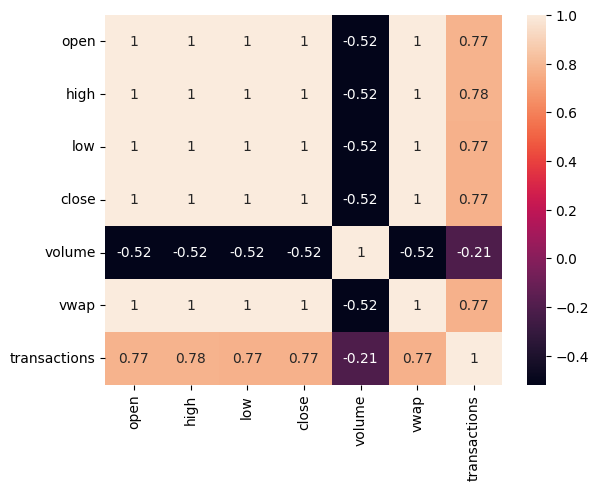

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_columns = ['open', 'high', 'low', 'close', 'volume','vwap','transactions']
sns.heatmap(df_clean[corr_columns].corr(), annot=True)
plt.show()

we can see a strong correlation between number of transactions and prices (open,close,low,high). as well as volume with prices - which indicates a strong dependence of prices on the activity of trading participants. The more actively a stock is traded and the more transactions occur, the more and faster the prices change.

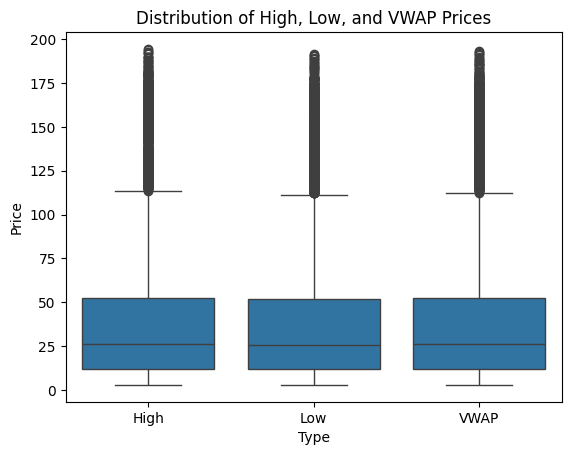

In [135]:
daily_prices_high = df_clean.groupby('formatted_time')['high'].mean()
daily_prices_low = df_clean.groupby('formatted_time')['low'].mean()
daily_vwap = df_clean.groupby('formatted_time')['vwap'].mean()

combined_data = pd.DataFrame({
    'Price': pd.concat([daily_prices_high, daily_prices_low, daily_vwap]),
    'Type': ['High'] * len(daily_prices_high) + ['Low'] * len(daily_prices_low) + ['VWAP'] * len(daily_vwap)
})

sns.boxplot(x='Type', y='Price', data=combined_data)
plt.title('Distribution of High, Low, and VWAP Prices')
plt.show()

here we see a very large number of outliers, which indicates key events (some days) that influenced price expectations from bidders

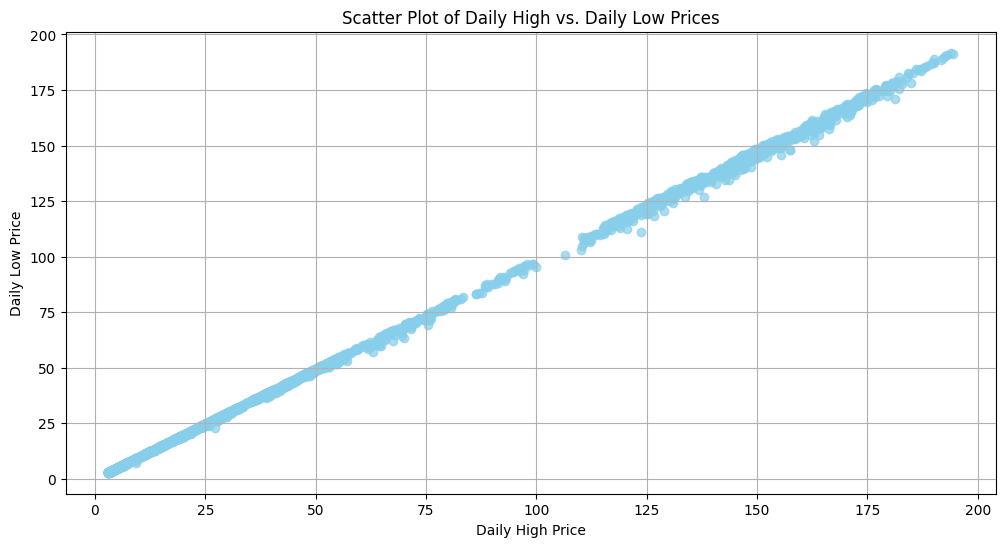

In [136]:
plt.figure(figsize=(12, 6))
plt.scatter(daily_prices_high, daily_prices_low, alpha=0.7, color ='skyblue')
plt.xlabel('Daily High Price')
plt.ylabel('Daily Low Price')
plt.title('Scatter Plot of Daily High vs. Daily Low Prices')
plt.grid(True)
plt.show()

usually the opening and closing prices are almost equal if we consider each individual day, but as the price increases over a long distance, outliers appear, indicating abnormal activity of trading participants

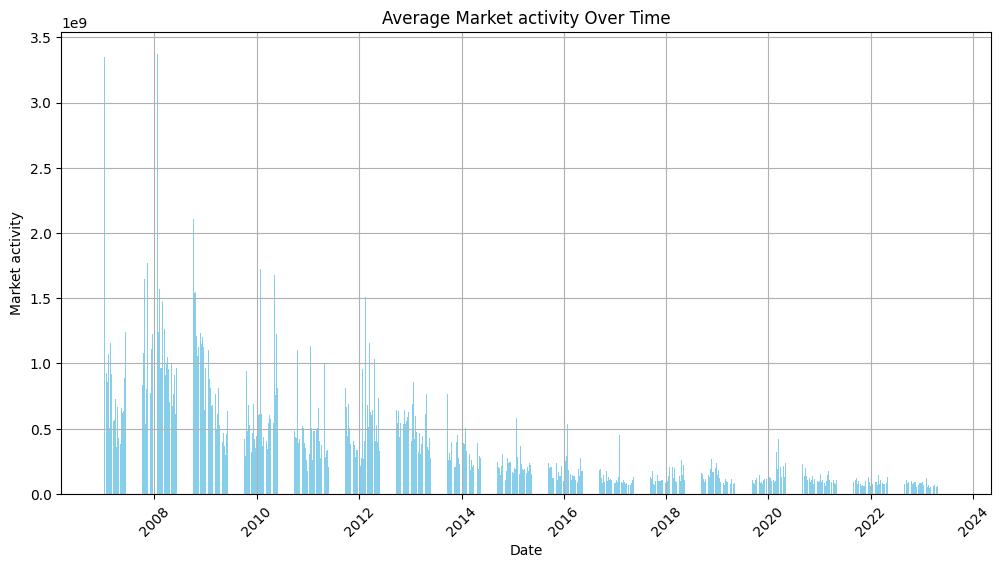

In [137]:
market_activity = df_clean.groupby('formatted_time')['volume'].mean()

plt.figure(figsize=(12, 6))
plt.bar(market_activity.index, market_activity.values, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Market activity')
plt.title('Average Market activity Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Trading activity has gradually and significantly decreased by 2024, the graph also shows some deviations in each period of time, indicating some major events. we can conclude that with an increase in stock prices, the downward trend in activity will continue

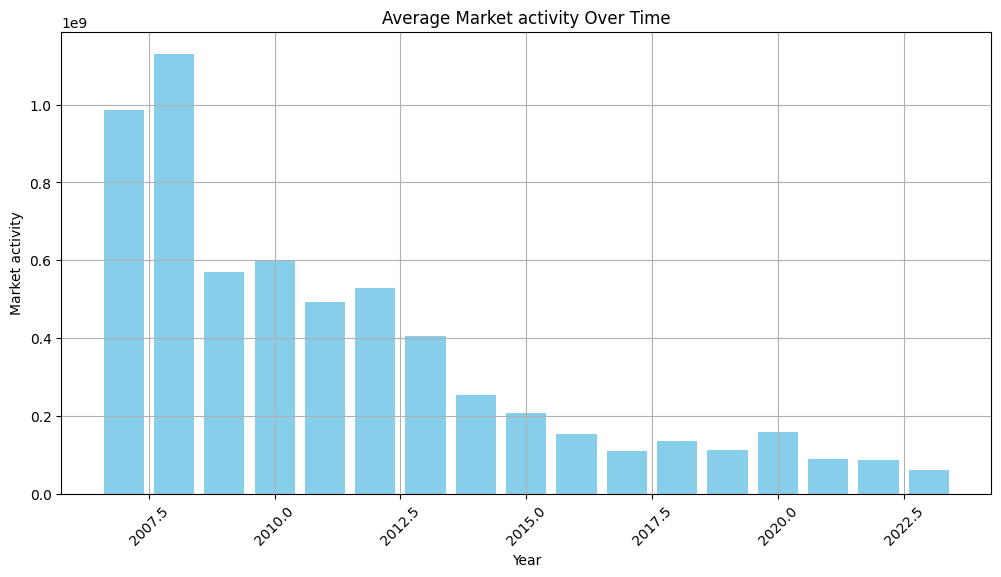

In [138]:
market_activity = df_clean.groupby('years')['volume'].mean()

plt.figure(figsize=(12, 6))
plt.bar(market_activity.index, market_activity.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Market activity')
plt.title('Average Market activity Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

If we consider activity by year, then the trend towards a decrease in activity is more clearly expressed

In [139]:
from scipy import stats
df_clean['price_change'] = df_clean['close'].pct_change() *100 # % change in stocks closing price
df_change = df_clean[['volume','price_change']].dropna()
corr, p_value = stats.pearsonr(df_change['volume'], df_change['price_change'])
print(f"Correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Correlation coefficient: -0.040353076422186544
P-value: 0.009258809990717494


a small negative correlation tells us that the more shares were bought/sold during the trading day, the smaller the percentage change in the closing price. on days of greatest activity, the closing price remains virtually unchanged, which can help in drawing up trading strategies

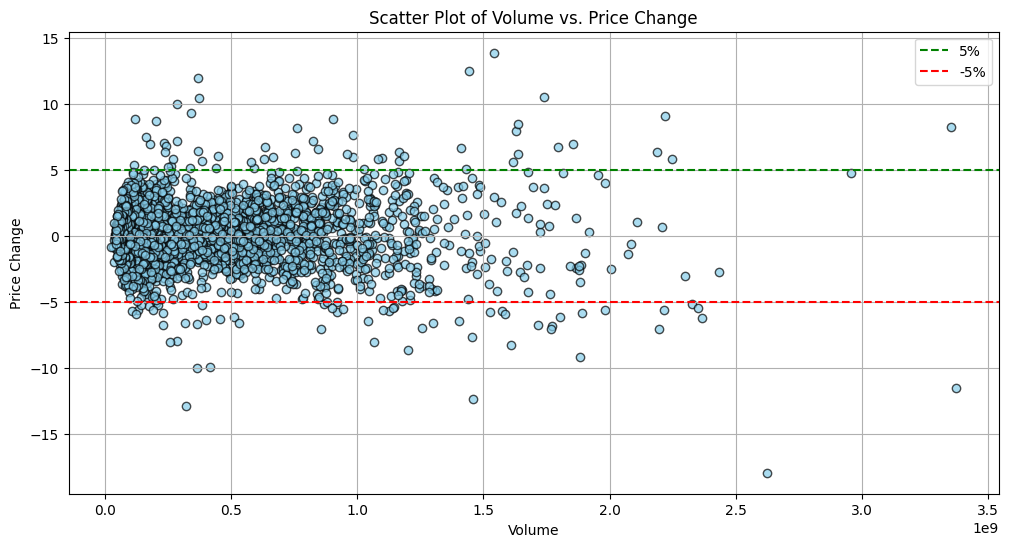

In [157]:
plt.figure(figsize=(12, 6))
plt.scatter(df_change['volume'], df_change['price_change'], alpha=0.7, edgecolor='k', color ='skyblue')
plt.xlabel('Volume')
plt.ylabel('Price Change')
plt.title('Scatter Plot of Volume vs. Price Change')
plt.grid(True)
plt.axhline(y=5, color='green', linestyle='--', label='5%')
plt.axhline(y=-5, color='red', linestyle='--', label='-5%')
plt.legend()
plt.show()

The average % change in closing price is 5%, and depending on trading activity it does not change much, with the exception of outliers

In [159]:
volume_tresholds = df_clean['volume'].quantile(0.95)
price_change_tresholds = 5
df_filtered = df_clean[['formatted_time','volume','price_change']].dropna()
events = df_filtered.groupby('formatted_time').filter(lambda x: (x['volume'] > volume_tresholds).any() and
                                                      (abs(x['price_change']) > price_change_tresholds).any())
print(events[['formatted_time', 'volume', 'price_change']])

          formatted_time        volume  price_change
4    2007-01-09 05:00:00  3.352007e+09      8.307944
10   2007-01-18 05:00:00  2.367294e+09     -6.192681
37   2007-02-27 05:00:00  1.147596e+09     -5.325163
139  2007-07-24 04:00:00  1.804989e+09     -6.130044
141  2007-07-26 04:00:00  2.186699e+09      6.368699
144  2007-07-31 04:00:00  1.770337e+09     -6.838114
165  2007-08-29 04:00:00  1.166884e+09      5.724946
169  2007-09-05 04:00:00  2.328227e+09     -5.133434
203  2007-10-23 04:00:00  1.794793e+09      6.768801
215  2007-11-08 05:00:00  1.890377e+09     -5.814897
216  2007-11-09 05:00:00  1.526238e+09     -5.754225
217  2007-11-12 05:00:00  1.769051e+09     -7.021554
218  2007-11-13 05:00:00  1.739446e+09     10.536475
253  2008-01-04 05:00:00  1.455829e+09     -7.633083
260  2008-01-15 05:00:00  2.350253e+09     -5.448708
261  2008-01-16 05:00:00  2.217376e+09     -5.560617
265  2008-01-23 05:00:00  3.373042e+09    -11.492449
275  2008-02-06 05:00:00  1.573270e+09     -5.

as we see, most of the major events with a sharp and large change in the closing price occurred in the crisis years of 2007-2008, when the entire market was fluctuating, regardless of the company and the specific expectations of investors

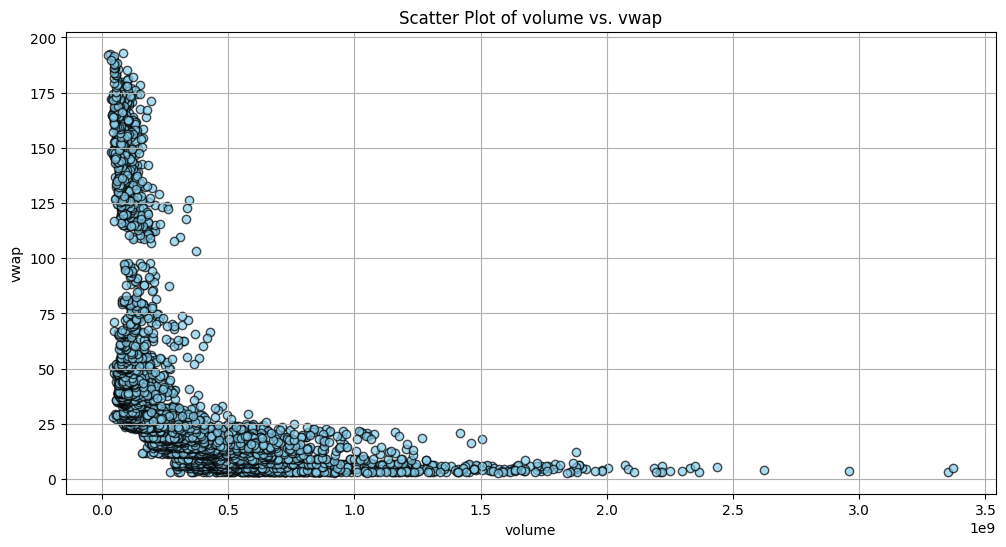

In [142]:
plt.figure(figsize=(12, 6))
plt.scatter(df_clean['volume'], df_clean['vwap'], alpha=0.7, edgecolor='k', color ='skyblue')
plt.xlabel('volume')
plt.ylabel('vwap')
plt.title('Scatter Plot of volume vs. vwap')
plt.grid(True)
plt.show()

Here we see that usually trading goes smoothly, in most of the volume and vwap points at the same level, however, in the upper points VWAP decreases with higher volume, and this could reflect selling pressure or a reaction to negative news.

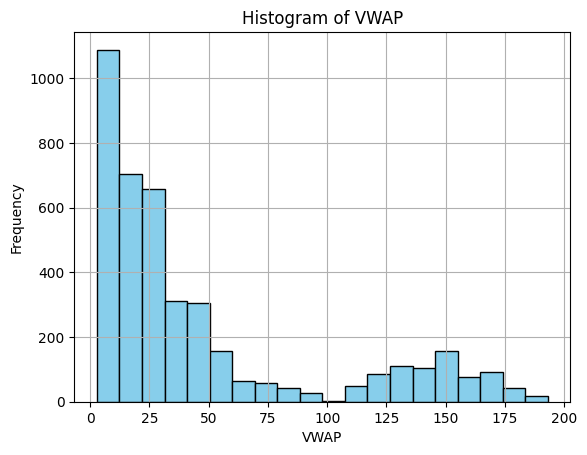

In [143]:
plt.hist(df_clean['vwap'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('VWAP')
plt.ylabel('Frequency')
plt.title('Histogram of VWAP')
plt.grid(True)
plt.show()

we see that usually the average stock price stays at the same level and does not change sharply. as in the charts below this is true for opening and closing prices

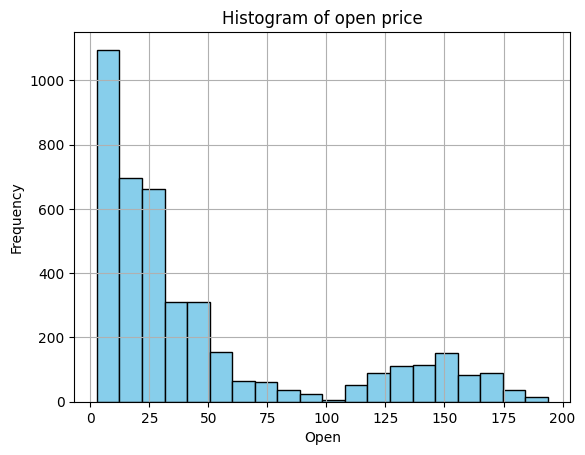

In [144]:
plt.hist(df_clean['open'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.title('Histogram of open price')
plt.grid(True)
plt.show()

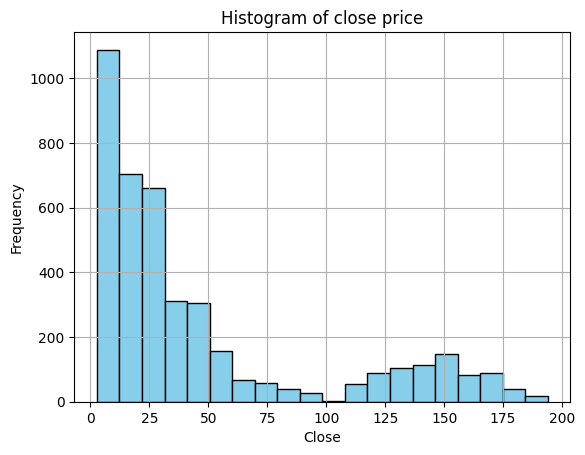

In [145]:
plt.hist(df_clean['close'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.title('Histogram of close price')
plt.grid(True)
plt.show()

In [147]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['formatted_time'],
                open=df_clean['open'],
                high=df_clean['high'],
                low=df_clean['low'],
                close=df_clean['close'])])

fig.show()

Several events can be highlighted here, this is a sharp drop in prices in 2019, 2020 (coronavirus period), and 2022-2023 against the backdrop of global events, but the general trend towards increasing prices continued, even despite the drops, and leveled off by the end of 2023. we can say that the company takes a confident position in the market and meets investors’ expectations

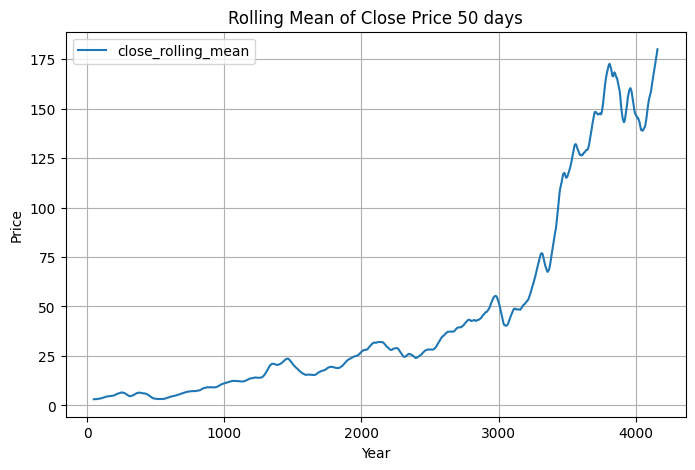

In [149]:
import numpy as np
df_clean['close_rolling_mean'] = np.round(df_clean['close'].rolling(window=50).mean(), 2)
df_clean[['close_rolling_mean']].plot(grid=True, figsize=(8, 5))
plt.title('Rolling Mean of Close Price 50 days')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

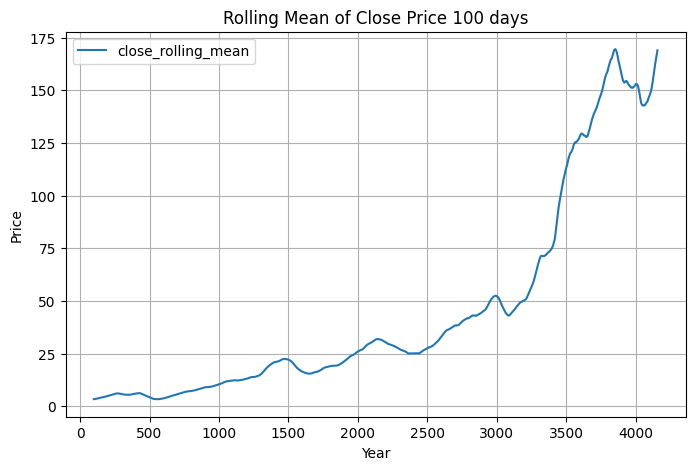

In [150]:
df_clean['close_rolling_mean'] = np.round(df_clean['close'].rolling(window=100).mean(), 2)
df_clean[['close_rolling_mean']].plot(grid=True, figsize=(8, 5))
plt.title('Rolling Mean of Close Price 100 days')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

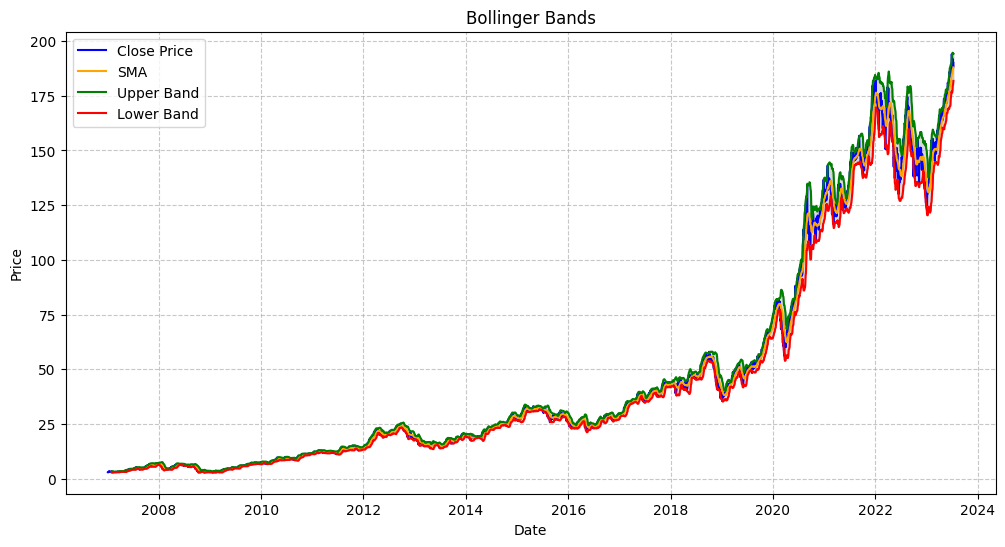

In [155]:
df_clean['SMA'] = df_clean['close'].rolling(window=20).mean() # typically 20 days period moving average of the price
df_clean['STD'] = df_clean['close'].rolling(window=20).std() # rolling std
df_clean['Upper_Band'] = df_clean['SMA'] + (df_clean['STD'] * 2) # adding x2 std
df_clean['Lower_Band'] = df_clean['SMA'] - (df_clean['STD'] * 2) # substracting 2x std
# we want to determine if the price is high, relative to historical volatility or its low relative
plt.figure(figsize=(12, 6))
plt.plot(df_clean['formatted_time'], df_clean['close'], label='Close Price', color='blue')
plt.plot(df_clean['formatted_time'], df_clean['SMA'], label='SMA', color='orange')
plt.plot(df_clean['formatted_time'], df_clean['Upper_Band'], label='Upper Band', color='green')
plt.plot(df_clean['formatted_time'], df_clean['Lower_Band'], label='Lower Band', color='red')
plt.fill_between(df_clean['formatted_time'], df_clean['Upper_Band'], df_clean['Lower_Band'], color='gray', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.grid(True, linestyle = '--', alpha=0.7)
plt.show()

here we can assess the volatility of stocks; for a long period from 2008 to 2020, stocks were low-volatile, but in the subsequent period volatility increased, but not critically. we can conclude that investments in these shares are quite safe and predictable

In [152]:
close_by_year = df_clean.groupby('years')['close'].apply(list)
year_2020 = close_by_year[2020]
year_2021 = close_by_year[2021]

t_stat, p_value = stats.ttest_ind(year_2020, year_2021)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in closing prices between 2020 and 2021.")
else:
    print("There is no significant difference in closing prices between 2020 and 2021.")

t-statistic: -27.588815162673935
p-value: 1.0073157969913293e-102
There is a significant difference in closing prices between 2020 and 2021.


In [153]:
close_by_year = df_clean.groupby('years')['close'].apply(list)
year_2022 = close_by_year[2022]
year_2023 = close_by_year[2023]

t_stat, p_value = stats.ttest_ind(year_2022, year_2023)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in closing prices between 2022 and 2023.")
else:
    print("There is no significant difference in closing prices between 2022 and 2023.")

t-statistic: -4.864232434086166
p-value: 1.685936837260292e-06
There is a significant difference in closing prices between 2022 and 2023.


price changes are increasing throughout the entire period, so it cannot be said that there are any periods (if we consider years) in which prices do not differ from the previous period